<a href="https://colab.research.google.com/github/Gabriel-C-Sant/Analise_de_Dados_Airbnb_Barcelona/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [33]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Gabriel-C-Sant/Analise_de_Dados_Airbnb_Barcelona/refs/heads/main/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id`- número de id gerado para identificar o imóvel
* `name`- nome da propiedade anunciada
* `host_id`- id do anfitrião
* `host_name`- nome do anfitrião
* `neighbourhood_group`- nome do distrito onde o imóvel está localizado
* `neibourhood`- nome do bairro onde o imóvel está localizado
* `latitude`- coordenada da latitude da propiedade
* `longitude`- coodenada da longitude da propiedade
* `room_type`- informa o tipo de quarto que é oferecido
* `price`- preço para alugar o imóvel
* `minimum_noghts`- quantidade minima de noites para reservar
* `number_of_reviews`- número de reviews que a propiedade possui
* `last_review` - data do ultimo review
* `reviews_per_month`- quantidade de review por mês
* `calculated_host_listings_count`- quantidade de imóveis do mesmo anfitrião
* `availability_365` - numero de dias disponíveis dentro de 365 dia
* `number_of_reviews_ltm`- número de avaliações nos ultimos 12 meses
* `lisence` - código de licença para locação do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [35]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,232.0,1,48,2025-06-11,0.33,28,65,6,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,382.0,3,88,2025-05-31,0.51,1,174,10,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,186.0,1,147,2025-05-14,0.87,3,39,26,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,131.0,31,25,2024-11-05,0.14,3,333,9,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,449.0,5,267,2025-06-17,1.49,3,315,31,ESFCTU000008119000093652000000000000000HUTB-00...


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [36]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t{df.shape[0]}\nVariaveis:\t{df.shape[1]}")

# verificar os tipos das variaveis
display(df.dtypes)


Entradas:	18927
Variaveis:	18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [37]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
license,0.334390
reviews_per_month,0.264067
last_review,0.264067
price,0.212078
host_name,0.000159
id,0.000000
name,0.000000
neighbourhood,0.000000
neighbourhood_group,0.000000
host_id,0.000000


**Tratamento de valores ausentes**

As variáveis do DataFrame que apresentam valores nulos são:

`license`

`reviews_per_month`

`last_review`

`price`

`host_name`

A variável `license` foi mantida como está, pois a ausência dessa informação pode indicar que o imóvel não possui licença, nesse caso o valor nulo carrega um significado relevante e não deve ser tratado como erro de preenchimento.

As variáveis `reviews_per_month`, `last_review` e `host_name` foram excluídas, pois qualquer forma de preenchimento poderia distorcer os dados originais.

Como o dataset possui a variável `number_of_reviews_ltm` (número de avaliações nos últimos 12 meses) sem valores nulos, o trade-off não compensaria, já que essa variável pode suprir a ausência das anteriores.

No caso de `host_name`, por se tratar de uma variável categórica, seria muito difícil preenchê-la de maneira consistente. Além disso, a variável `host_id` já fornece a informação que `host_name` representa.

Para a variável `price`, os valores nulos foram preenchidos com a mediana dos preços de cada distrito (neighbourhood_group), garantindo uma imputação coerente com o comportamento local dos preços.

In [38]:
# substituindo os valores ausentes na coluna price pelas medianas dos valores price de acordo com sous distritos correspondentes
ng_price_null = df.loc[df.price.isnull(), 'neighbourhood_group'].unique()
median_price_null = df[df.neighbourhood_group.isin(ng_price_null)].groupby('neighbourhood_group').price.median()
df.loc[df.price.isnull(), 'price'] = df.loc[df.price.isnull(), 'neighbourhood_group'].map(median_price_null)

# excluindo a coluna host_name
df.drop(columns='host_name', inplace=True)
df.drop(columns='last_review', inplace=True)
df.drop(columns='reviews_per_month', inplace=True)

In [39]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
license,0.33439
name,0.00000
id,0.00000
neighbourhood_group,0.00000
neighbourhood,0.00000
latitude,0.00000
host_id,0.00000
longitude,0.00000
room_type,0.00000
minimum_nights,0.00000


### **Q3. Qual o tipo de distribuição das variáveis?**

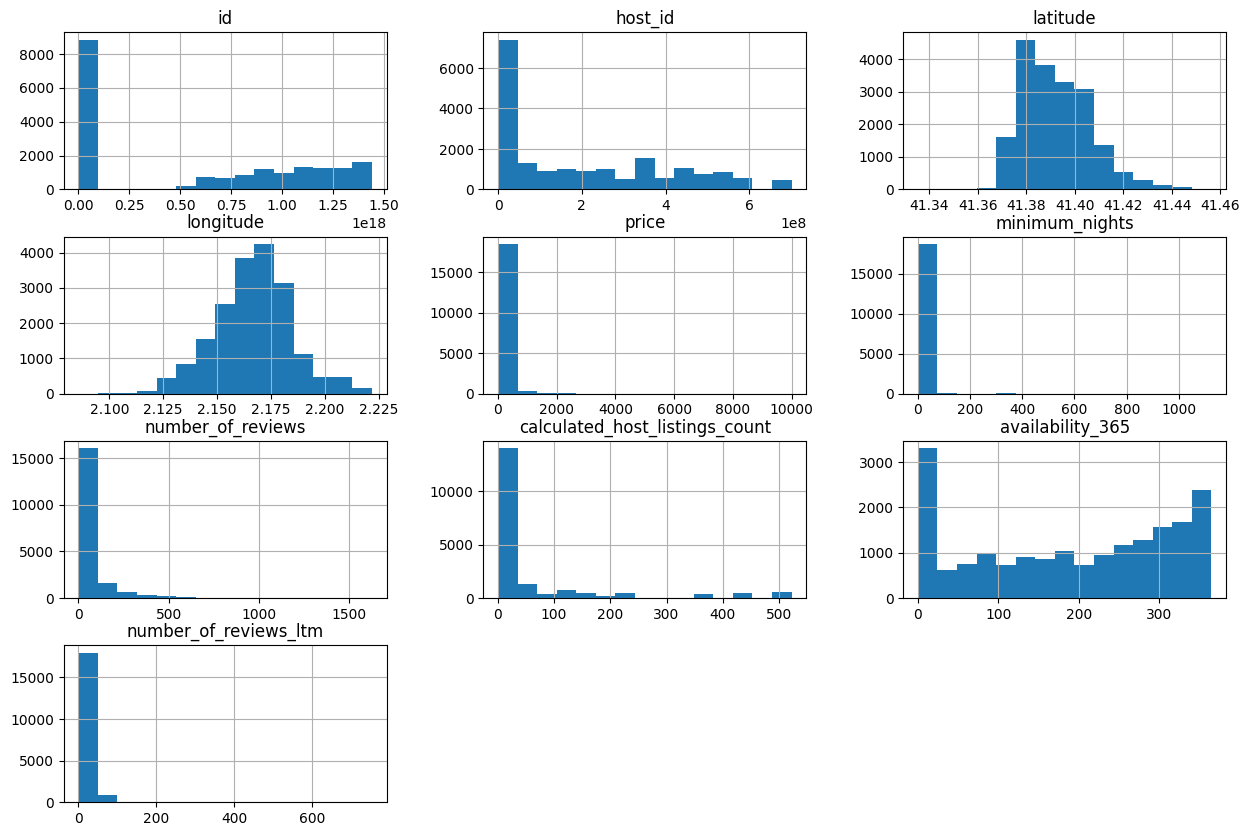

In [40]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

##**Existem outliers?**

Ao observar os histogramas, podemos perceber indícios da existência de outiliers, um exemplo é a variável `price` que não segue uma distribuição regular.

Para verificar essa hipostese, usareia a função `describe()`, que nos dará um resumo estatístico e gerarei grafícos `boxplot` para as variáveis




In [41]:
# ver resumo estatísco das variaveis numericas
df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,18927.000000,18927.000000,18927.000000,18927.000000,18927.000000,18927.000000
mean,198.785967,16.428700,51.420880,58.118402,189.396629,11.485497
std,344.010392,29.671949,105.225157,118.410875,125.983317,22.548024
min,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,81.000000,1.000000,0.000000,2.000000,75.000000,0.000000
50%,141.000000,3.000000,6.000000,7.000000,204.000000,1.000000
75%,219.000000,31.000000,53.000000,39.000000,305.000000,15.000000
max,10000.000000,1124.000000,1624.000000,522.000000,365.000000,753.000000


#Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A variável price possui 75% do valor abaixo de 219, porém seu valor máximo é 10000.
A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.


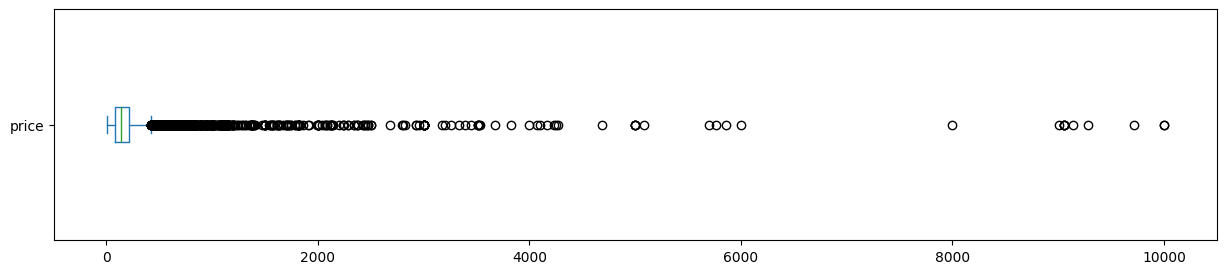


price: valores acima de 1300
159 entradas
0.8401%


In [42]:
# boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 1300 para price
print("\nprice: valores acima de 1300")
print(f"{(len(df[df.price > 1300]))} entradas")
print(f"{(len(df[df.price > 1300]) / df.shape[0])*100:.4}%")


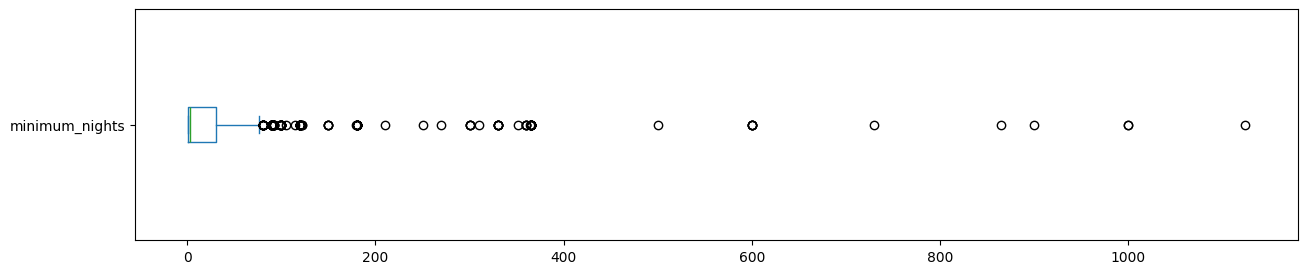

minimum_nights: valores acima de 30:
200 entradas
1.057%


In [43]:
# box plot para minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print(f"{(len(df[df.minimum_nights > 70]))} entradas")
print(f"{(len(df[df.minimum_nights > 70]) / df.shape[0])*100:.4}%")

**Histogramas sem outliers**

Já que identificamos outliers nas variáveis `price` e `minimum_nights`, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

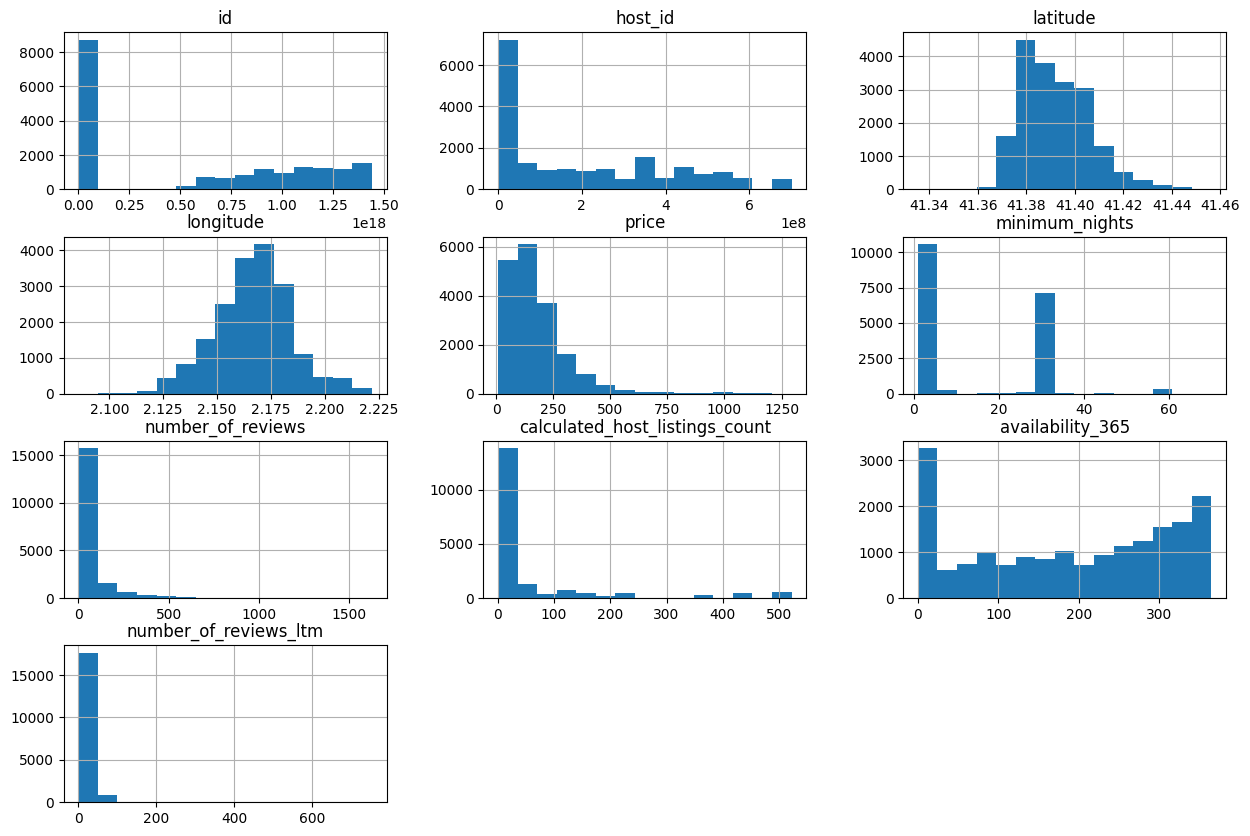

In [44]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 70].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [45]:
# ver a média da coluna `price``
print(df.price.mean())

198.78596713689439


### **Q4. Qual a correlação existente entre as variáveis**

Correlação se refere à relação entre duas variáveis. Essa relação pode ser medida por meio de um coeficiente de correlação: quanto maior o valor absoluto desse coeficiente, mais forte é a relação entre as variáveis. É importante lembrar que correlação não implica causalidade — ou seja, duas variáveis podem estar relacionadas sem que uma seja a causa da outra.

In [46]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365' ]].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.130335,0.046690,0.112642,0.117765
minimum_nights,-0.130335,1.000000,-0.177900,0.110698,0.040515
number_of_reviews,0.046690,-0.177900,1.000000,-0.161394,0.041441
calculated_host_listings_count,0.112642,0.110698,-0.161394,1.000000,0.208906
availability_365,0.117765,0.040515,0.041441,0.208906,1.000000


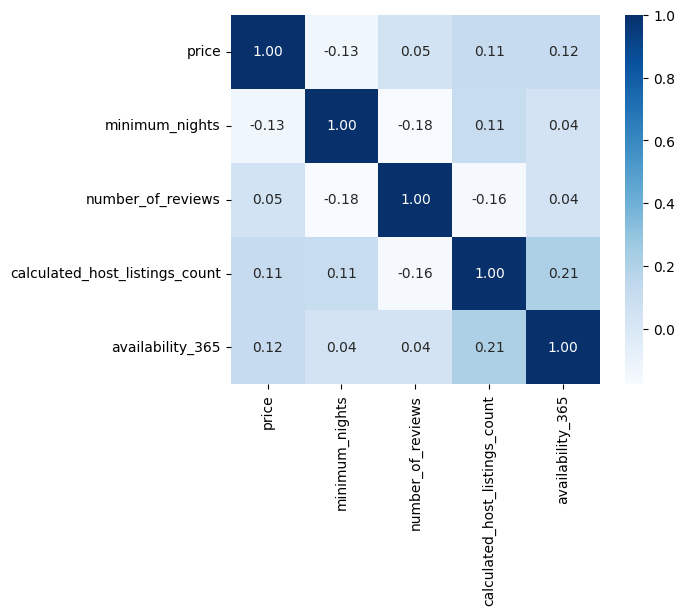

In [47]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='Blues', fmt='.2f', square=True, linecolor= 'white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [48]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


,count
room_type,
Entire home/apt,11366
Private room,7019
Shared room,92
Hotel room,91


In [49]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

,count
room_type,
Entire home/apt,0.612128
Private room,0.378016
Shared room,0.004955
Hotel room,0.004901


### **Q6. Qual a localidade mais cara do dataset?**



In [50]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)

,price
neighbourhood,
Diagonal Mar i el Front Marítim del Poblenou,263.169753
la Dreta de l'Eixample,260.392841
la Vila Olímpica del Poblenou,246.271242
Sant Antoni,219.750266
l'Antiga Esquerra de l'Eixample,210.094412
...,...
Verdun,61.466667
la Prosperitat,61.269231
la Guineueta,60.230769


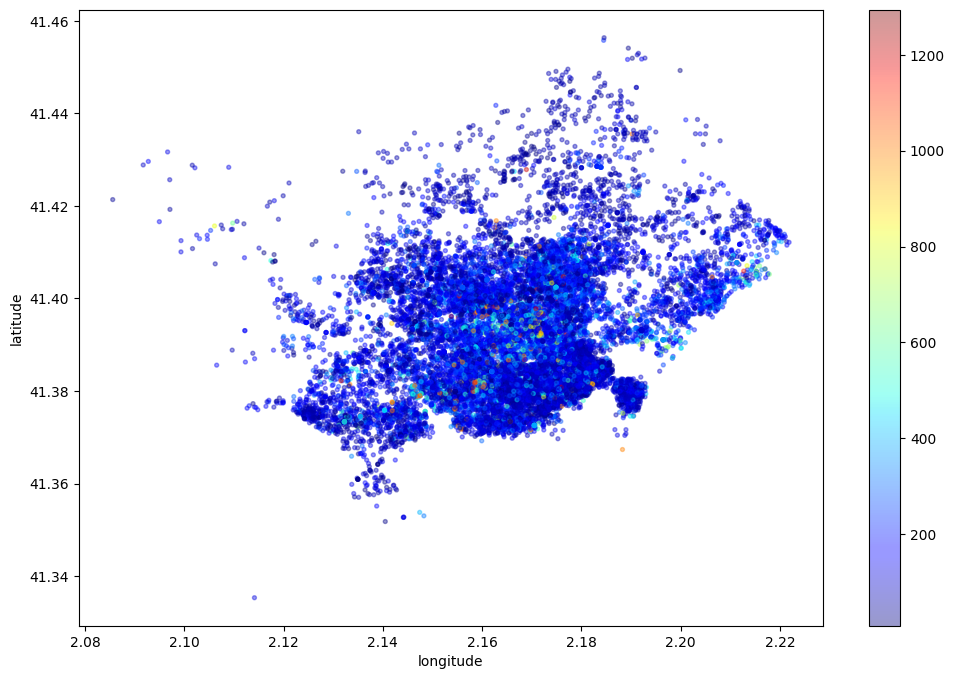

In [51]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [52]:
# ver a média da coluna `minimum_nights``
print(f"Média de minimum_nights: {df_clean.minimum_nights.mean()}")

Média de minimum_nights: 14.75021542438604


## Conclusões

Foi realizada uma análise exploratória inicial com o objetivo de obter uma visão geral do contexto dos dados.

Os fatores que mais se destacaram foram a presença de outliers, evidenciada nas variáveis `price` e `minimum_nights`, e a existência de valores nulos. A maioria desses valores podem ser tratados com a exclusão das variáveis correspondentes, pois não trazem informações relevantes para a análise. Entretanto, a variável `price`, que também possui valores nulos, requer um tratamento mais detalhado e cuidadoso.

Por fim, observou-se que as variáveis não apresentam correlações fortes entre si.